<a href="https://colab.research.google.com/github/emarttila/Koodausnaytteet/blob/main/Koneoppiminen_ja_datan_analysointi_(Student_Performance_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aineistona on portugalilaisen koulun oppilailta kerättyjä tietoja. Kerättyjen tietojen vaikutusta oppilaiden loppuarvosanaan matematiikassa (G3) pyrittiin hahmottamaan ja ennustamaan. Mukana ovat myös väliarvosanat G1 ja G2.**


*P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. *

In [74]:
#Tuodaan tarvittavat kirjastot.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [75]:
#Avataan aineisto.
dataset = pd.read_csv("student-mat.csv", sep = ';')

In [76]:
#Katsotaan aineiston yleisilme.
print(dataset.head())
print(dataset.info())

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395

In [77]:
#Katsotaan onko aineistossa puuttuvia arvoja (ei ole).
dataset.isnull().sum().sum()

0

In [78]:
#Muutetaan objekti- datatyypit kategorioiksi.
for i in dataset.columns:
  if dataset[i].dtype == 'O':
    dataset[i] = dataset[i].astype('category')

In [79]:
#Tarkastellaan korrelaatioita aineistosta G3:n eli lopullisen arvosanan kanssa. 
korrelaatio = dataset.corr()
korrelaatio['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

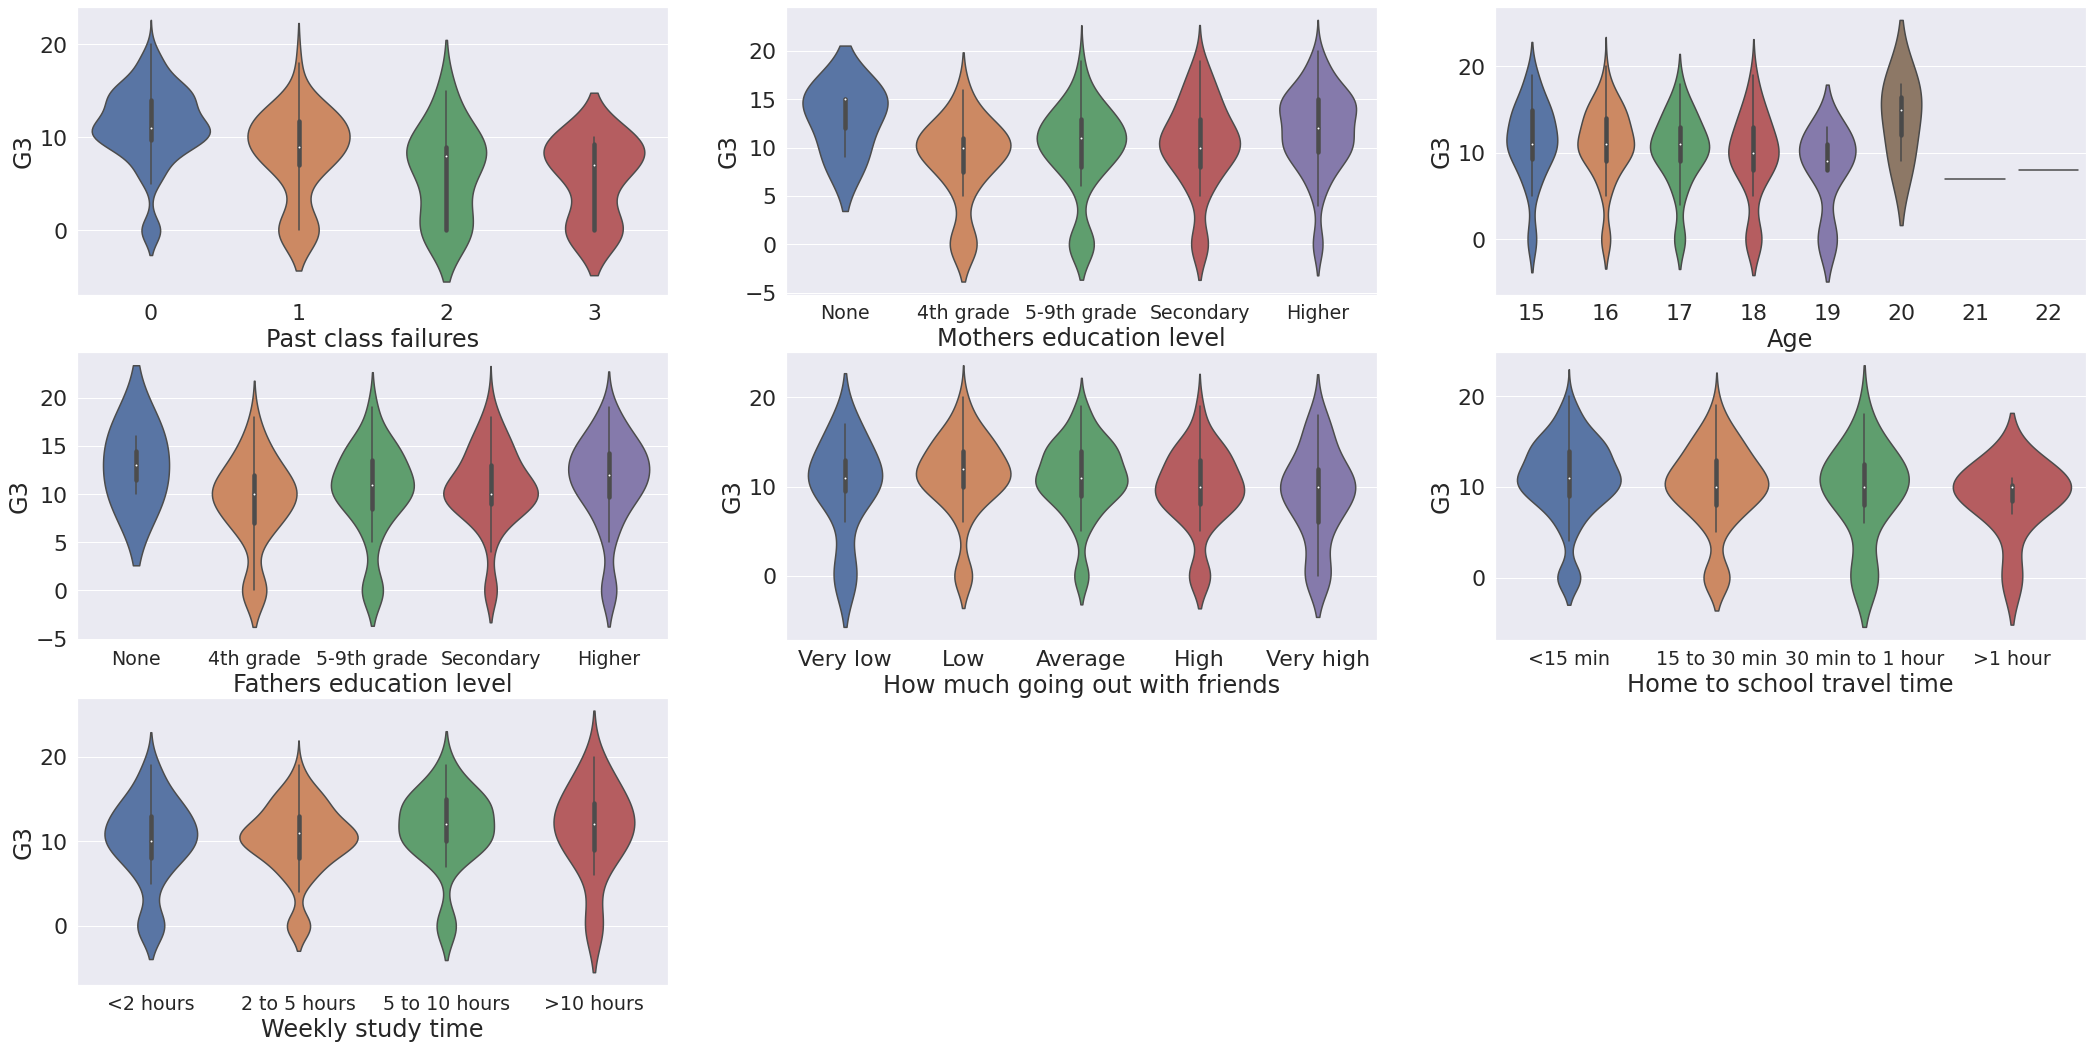

In [94]:
#Valitaan aineistosta muuttujat, joiden korrelaation itseisarvo G3:n eli lopullisen arvosanan kanssa on vähintään 0,09. G2 ja G1 jätetään pois, koska ne ovat väliarvosanoja ja niillä on suuri vaikutus lopulliseen arvosanaan. Piirretään kuvaajaan jokainen muuttuja ja sen yhteys G3:n.
sns.set(font_scale=2)
sns.set_style('darkgrid')
f, ax = plt.subplots(3,3, figsize = (36,18), sharex=False, sharey=False)
failures = sns.violinplot(dataset['failures'], dataset['G3'], ax=ax[0][0])
failures.set_xlabel('Past class failures')
Medu = sns.violinplot(dataset['Medu'], dataset['G3'], ax=ax[0][1])
Medu.set_xlabel('Mothers education level')
Medu.set_xticklabels(['None','4th grade','5-9th grade','Secondary','Higher'], fontsize = 19)
age = sns.violinplot(dataset['age'], dataset['G3'], ax=ax[0][2])
age.set_xlabel('Age')
Fedu = sns.violinplot(dataset['Fedu'], dataset['G3'], ax=ax[1][0])
Fedu.set_xlabel('Fathers education level')
Fedu.set_xticklabels(['None','4th grade','5-9th grade','Secondary','Higher'], fontsize = 19)
goout = sns.violinplot(dataset['goout'], dataset['G3'], ax=ax[1][1])
goout.set_xlabel('How much going out with friends')
goout.set_xticklabels(['Very low','Low','Average','High','Very high'])
traveltime = sns.violinplot(dataset['traveltime'], dataset['G3'], ax=ax[1][2])
traveltime.set_xlabel('Home to school travel time')
traveltime.set_xticklabels(['<15 min','15 to 30 min','30 min to 1 hour','>1 hour'], fontsize = 19)
studytime = sns.violinplot(dataset['studytime'], dataset['G3'], ax=ax[2][0])
studytime.set_xlabel('Weekly study time')
studytime.set_xticklabels(['<2 hours','2 to 5 hours','5 to 10 hours','>10 hours'], fontsize = 19)
for i in [7,8]:
  f.delaxes(ax.flatten()[i])


Kuvaajasta näkee, että 'Past class failures' korreloi negatiivisesti matematiikan arvosanan kanssa. Isän ja äidin koulutustason korrelaatio matematiikan arvosanaan on ristiriitainen. Kaikista matalin koulutustaso ennustaa parempaa arvosanaa kuin seuraavaksi korkein. Siitä lähtien kuitenkin koulutustason paraneminen korreloi positiivisesti arvosanan kanssa. Oppilaan ikä korreloi negatiivisesti arvosanan kanssa, paitsi 20:s ikävuosi, jolloin korrelaatio kääntyy positiiviseksi. Ystävien kanssa vietetty aika korreloi negatiivisesti arvosanan kanssa. Negatiivinen korrelaatio voimistuu mitä enemmän ystävien kanssa vietetty aika kasvaa. Mitä pidempi koulumatka, sen huonompi arvosana. Viikottainen opiskeluaika on yllättävän vähän yhteydessä arvosanaan. Kuitenkin mitä enemmän opiskelee, sen parempi kokeen tulos. Hajonta on kuitenkin suurta varsinkin eniten opiskelevien ryhmässä.

In [81]:
#Jaetaan aineisto riippumattomiin ja riippuvaan muuttujaa. Jätetään G1 ja G2 eli väliarvosanat pois kokonaan.
X = dataset.iloc[:, :-3].values
y = dataset.iloc[:, -1].values

In [82]:
#Koodataan kategoriset muuttujat OneHotEncoderilla.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [83]:
#Jaetaan havainnot training ja test settiin.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [84]:
#Käytetään XGboostia regressiomallin luomiseen ja loppukokeen tuloksen ennustamiseen.
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

[10:50:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [85]:
#Taulukoidaan vierekkäin ennustettu ja testisetin todellinen arvo.
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[12.27 14.  ]
 [ 8.06 10.  ]
 [10.57  9.  ]
 [13.33 15.  ]
 [12.52 16.  ]
 [12.88 12.  ]
 [ 6.33 14.  ]
 [11.46 11.  ]
 [11.03  9.  ]
 [12.43 15.  ]
 [10.95 10.  ]
 [ 8.14 11.  ]
 [13.14 10.  ]
 [11.59  8.  ]
 [13.04 15.  ]
 [13.25 14.  ]
 [ 9.76 12.  ]
 [ 8.79  0.  ]
 [11.84 10.  ]
 [11.87 16.  ]
 [ 6.24  0.  ]
 [ 1.65  0.  ]
 [ 9.84  8.  ]
 [11.08 16.  ]
 [10.47 12.  ]
 [15.61 15.  ]
 [11.18 10.  ]
 [13.97 19.  ]
 [11.29  0.  ]
 [13.8  14.  ]
 [ 1.23  0.  ]
 [ 8.89 10.  ]
 [13.34  8.  ]
 [ 8.85  4.  ]
 [15.42 13.  ]
 [ 7.92 10.  ]
 [13.21 13.  ]
 [12.03 18.  ]
 [ 9.57  8.  ]
 [ 8.83 11.  ]
 [ 9.44  6.  ]
 [11.66 18.  ]
 [ 8.56  8.  ]
 [11.08  8.  ]
 [10.11 11.  ]
 [ 1.49  0.  ]
 [12.3  13.  ]
 [ 2.17  0.  ]
 [12.06 13.  ]
 [ 2.34  7.  ]
 [12.03 10.  ]
 [14.47 18.  ]
 [10.97 10.  ]
 [10.31  9.  ]
 [12.3  11.  ]
 [10.88  6.  ]
 [11.72  9.  ]
 [ 6.69 13.  ]
 [11.43 15.  ]
 [ 9.03 14.  ]
 [15.24 14.  ]
 [13.31 15.  ]
 [12.25 14.  ]
 [11.28 15.  ]
 [12.73  0.  ]
 [12.37 15.  ]
 [11.32 19

In [86]:
#Katsotaan ennustuksen tarkkuus R2 testillä. Heikolta näyttää. Entä jos väliarvosanat ovat mukana?
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2690986585176638

In [87]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [90]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

[10:50:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [91]:
y_pred = regressor.predict(X_test)

In [92]:
#Jos väliarvosanat otetaan mukaan, niin mallin ennustuksen tarkkuus paranee huimasti.
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8615536471913244